<a href="https://colab.research.google.com/github/ibader85/UnstructuredDataAnalytics/blob/main/07_Topic_Modeling_Tidy_Book.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

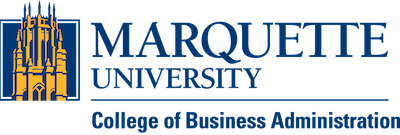

#BUAN4060: Unstructured Data Analytics

##07 Topic Modeling Tidy Book

##Instructor: Dr. Badar Al Lawati "Dr. B"

**Acknowledgment:** This material is based on the content created by `Prof. Timothy E. Carone`

**R on Colab:**

* You can change the runtime from Python to R, by clicking on the down arrow next to Connect, and picking "Change Runtime Type"

* You can change the project name by clicking on the title on top of this page

* You can export your notebook by going to File > Download .ipynb



##1. Topic Modeling

In text mining, we often have collections of documents, such as blog posts or news articles, that we’d like to divide into natural groups so that we can understand them separately

Topic modeling is a method for unsupervised classification of such documents, similar to clustering on numeric data, which finds natural groups of items even when we’re not sure what we’re looking for

Latent Dirichlet allocation (LDA) is a particularly popular method for fitting a topic model

It treats each document as a mixture of topics, and each topic as a mixture of words. This allows documents to “overlap” each other in terms of content, rather than being separated into discrete groups, in a way that mirrors typical use of natural language

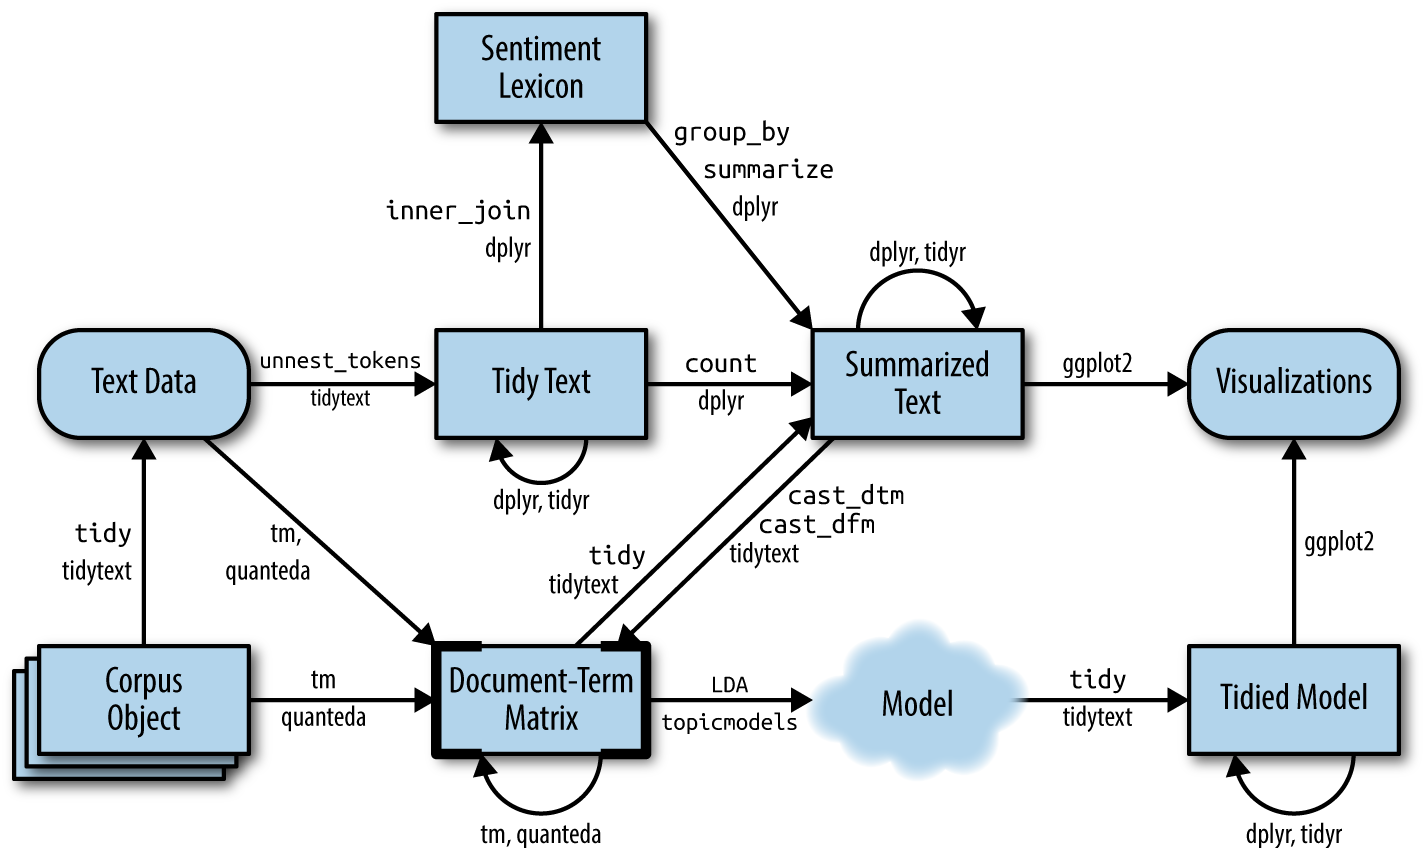

Figure 1.1: A flowchart of a text analysis that incorporates topic modeling. The topicmodels package takes a Document-Term Matrix as input and produces a model that can be tided by tidytext, such that it can be manipulated and visualized with dplyr and ggplot2.

As Figure 1.1 shows, we can use tidy text principles to approach topic modeling with the same set of tidy tools we’ve used throughout this book. In this chapter, we’ll learn to work with LDA objects from the [topicmodels package](https://cran.r-project.org/package=topicmodels), particularly tidying such models so that they can be manipulated with ggplot2 and dplyr. We’ll also explore an example of clustering chapters from several books, where we can see that a topic model “learns” to tell the difference between the four books based on the text content.

###1.1 Latent Dirichlet allocation

Latent Dirichlet allocation is one of the most common algorithms for topic modeling. Without diving into the math behind the model, we can understand it as being guided by two principles.

* **Every document is a mixture of topics:** We imagine that each document may contain words from several topics in particular proportions. For example, in a two-topic model we could say “Document 1 is 90% topic A and 10% topic B, while Document 2 is 30% topic A and 70% topic B.”

* **Every topic is a mixture of words:** For example, we could imagine a two-topic model of American news, with one topic for “politics” and one for “entertainment.” The most common words in the politics topic might be “President”, “Congress”, and “government”, while the entertainment topic may be made up of words such as “movies”, “television”, and “actor”. Importantly, words can be shared between topics; a word like “budget” might appear in both equally

**LDA is a mathematical method for estimating both of these at the same time: finding the mixture of words that is associated with each topic, while also determining the mixture of topics that describes each document.** There are a number of existing implementations of this algorithm, and we’ll explore one of them in depth

Previously we briefly introduced the AssociatedPress dataset provided by the topicmodels package, as an example of a DocumentTermMatrix. This is a collection of 2246 news articles from an American news agency, mostly published around 1988

In [12]:
system2('sudo', 'apt-get install libgsl0-dev')

In [13]:
install.packages("topicmodels")
library(topicmodels)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘NLP’, ‘BH’, ‘modeltools’, ‘slam’, ‘tm’




In [14]:
data("AssociatedPress")
AssociatedPress

<<DocumentTermMatrix (documents: 2246, terms: 10473)>>
Non-/sparse entries: 302031/23220327
Sparsity           : 99%
Maximal term length: 18
Weighting          : term frequency (tf)

We can use the `LDA()` function from the topicmodels package, setting `k = 2`, to create a two-topic LDA model

Almost any topic model in practice will use a larger `k`, but we will soon see that this analysis approach extends to a larger number of topics

This function returns an object containing the full details of the model fit, such as how words are associated with topics and how topics are associated with documents

In [15]:
# set a seed so that the output of the model is predictable
ap_lda <- LDA(AssociatedPress, k = 2, control = list(seed = 1234)) # identify 2 topics in the dataset
ap_lda

A LDA_VEM topic model with 2 topics.

Fitting the model was the “easy part”: the rest of the analysis will involve exploring and interpreting the model using tidying functions from the tidytext package.

### 1.1.1 Word-topic probabilities

Previously we introduced the `tidy()` method, originally from the broom package [@R-broom](https://cran.r-project.org/web/packages/broom/vignettes/broom.html), for tidying model objects. The tidytext package provides this method for extracting the per-topic-per-word probabilities, called 𝛽 (“beta”), from the model.

In [16]:
install.packages("tidytext")
library(tidytext)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘SnowballC’, ‘janeaustenr’, ‘tokenizers’




In [17]:
install.packages("reshape2")
library(reshape2)

ap_topics <- tidy(ap_lda, matrix = "beta")
ap_topics

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘plyr’




topic,term,beta
<int>,<chr>,<dbl>
1,aaron,1.686917e-12
2,aaron,3.895941e-05
1,abandon,2.654910e-05
2,abandon,3.990786e-05
1,abandoned,1.390663e-04
2,abandoned,5.876946e-05
1,abandoning,2.454843e-33
2,abandoning,2.337565e-05
1,abbott,2.130484e-06


Notice that this has turned the model into a one-topic-per-term-per-row format. For each combination, the model computes the probability of that term being generated from that topic. For example, the term “aaron” has a 1.686917×10−12 probability of being generated from topic 1, but a 3.8959408×10−5 probability of being generated from topic 2.

We could use dplyr’s `slice_max()` to find the 10 terms that are most common within each topic. As a tidy data frame, this lends itself well to a ggplot2 visualization (Figure 1.2).

In [18]:
install.packages("ggplot2")
install.packages("dplyr")

library(ggplot2)
library(dplyr)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




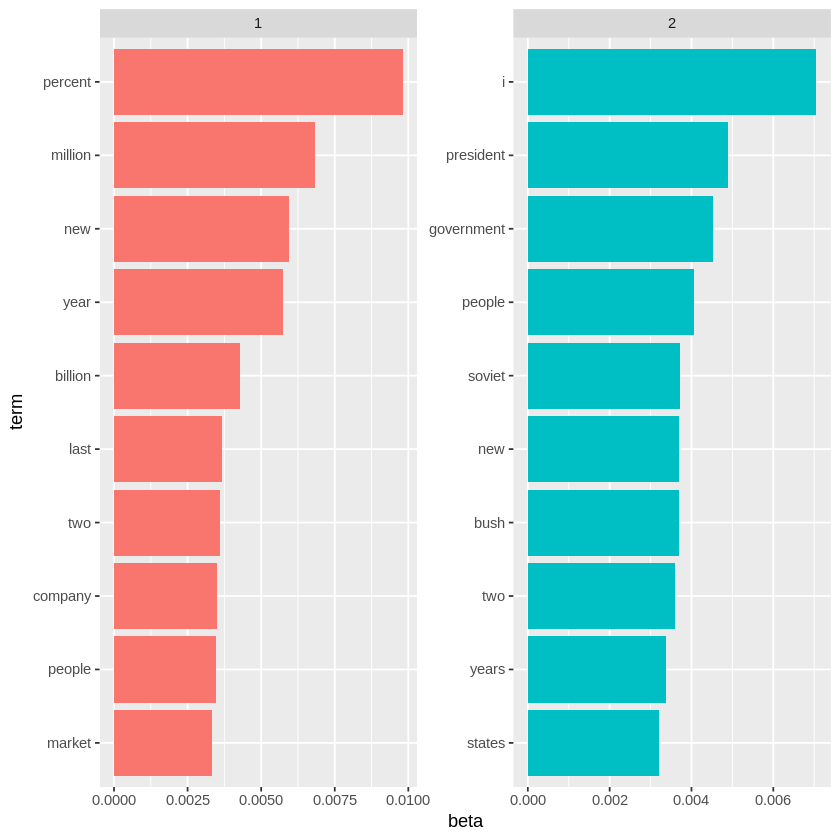

In [19]:
ap_top_terms <- ap_topics %>%
  group_by(topic) %>%
  slice_max(beta, n = 10) %>% # For each topic group, it selects the top 10 terms with the highest "beta" values
                              # "Beta" is the probability of a term being associated with a particular topic
  ungroup() %>%
  arrange(topic, -beta) # You get the top terms for each topic sorted by their probabilities

ap_top_terms %>%
  mutate(term = reorder_within(term, beta, topic)) %>%
  ggplot(aes(beta, term, fill = factor(topic))) +
  geom_col(show.legend = FALSE) +
  facet_wrap(~ topic, scales = "free") +
  scale_y_reordered()

Figure 1.2: The terms that are most common within each topic

This visualization lets us understand the two topics that were extracted from the articles. The most common words in topic 1 include “percent”, “million”, “billion”, and “company”, which suggests it may represent business or financial news. Those most common in topic 2 include “president”, “government”, and “soviet”, suggesting that this topic represents political news

One important observation about the words in each topic is that some words, such as “new” and “people”, are common within both topics. This is an advantage of topic modeling as opposed to “hard clustering” methods: topics used in natural language could have some overlap in terms of words

As an alternative, we could consider the terms that had the greatest difference in 𝛽 between topic 1 and topic 2. This can be estimated based on the log ratio of the two: log2(𝛽2/𝛽1) (a log ratio is useful because it makes the difference symmetrical: 𝛽2 being twice as large leads to a log ratio of 1, while 𝛽1 being twice as large results in -1)

To constrain it to a set of especially relevant words, we can filter for relatively common words, such as those that have a 𝛽 greater than 1/1000 in at least one topic

In [20]:
install.packages("tidyr")
library(tidyr)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘tidyr’


The following object is masked from ‘package:reshape2’:

    smiths




In [21]:
beta_wide <- ap_topics %>%
  mutate(topic = paste0("topic", topic)) %>% # append the prefix "topic" to the topic column in ap_topics
  pivot_wider(names_from = topic, values_from = beta) %>% # transform data from a long format where each row represents a term in a topic to a wide format where columns represent topics
  filter(topic1 > .001 | topic2 > .001) %>% # filter the data to include only rows where either topic1 or topic2 has a beta value greater than 0.001
  mutate(log_ratio = log2(topic2 / topic1)) # calculate the log ratio of beta values between topic2 and topic1
# to measure the difference in importance or relevance of terms between these two topics

beta_wide

term,topic1,topic2,log_ratio
<chr>,<dbl>,<dbl>,<dbl>
administration,4.309502e-04,1.382244e-03,1.6814189
ago,1.065216e-03,8.421279e-04,-0.3390353
agreement,6.714984e-04,1.039024e-03,0.6297728
aid,4.759043e-05,1.045958e-03,4.4580091
air,2.136933e-03,2.966593e-04,-2.8486628
american,2.030497e-03,1.683884e-03,-0.2700405
analysts,1.087581e-03,5.779708e-07,-10.8778386
area,1.371397e-03,2.310280e-04,-2.5695069
army,2.622192e-04,1.048089e-03,1.9989152


The words with the greatest differences between the two topics are visualized in Figure 1.3

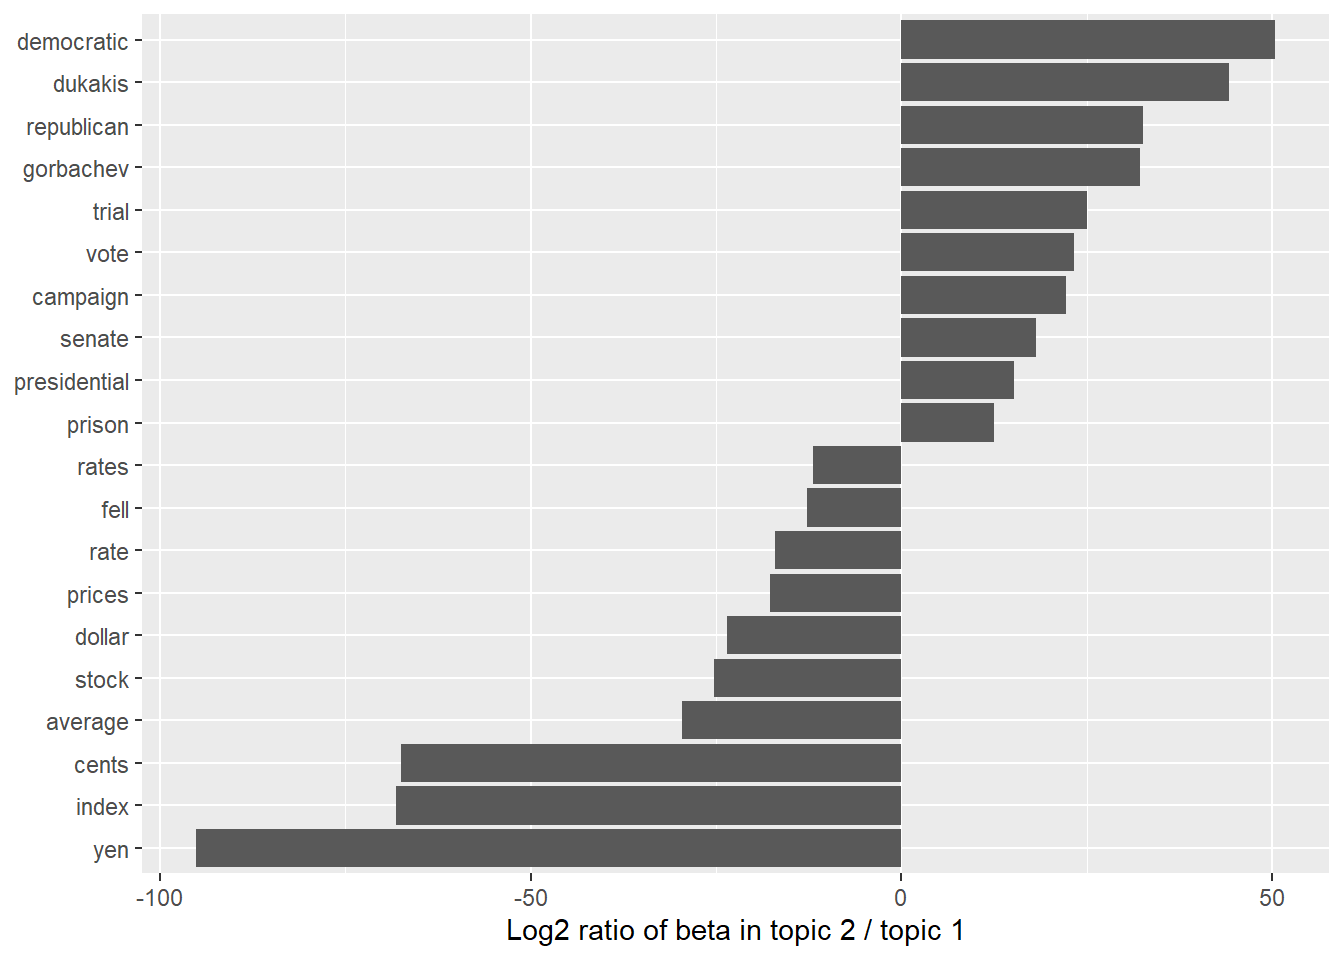

Figure 1.3: Words with the greatest difference in 𝛽 between topic 2 and topic 1

We can see that the words more common in topic 2 include political parties such as “democratic” and “republican”, as well as politician’s names such as “dukakis” and “gorbachev”. Topic 1 was more characterized by currencies like “yen” and “dollar”, as well as financial terms such as “index”, “prices” and “rates”. This helps confirm that the two topics the algorithm identified were political and financial news.

### 1.1.2 Document-topic probabilities

Besides estimating each topic as a mixture of words, LDA also models each document as a mixture of topics. We can examine the per-document-per-topic probabilities, called 𝛾 (“gamma”), with the `matrix = "gamma"` argument to `tidy()`

In [22]:
ap_documents <- tidy(ap_lda, matrix = "gamma") # "gamma" represents the probabilities of each topic being present in a specific document
ap_documents

document,topic,gamma
<int>,<int>,<dbl>
1,1,0.2480616686
2,1,0.3615485445
3,1,0.5265844180
4,1,0.3566530023
5,1,0.1812766762
6,1,0.0005883388
7,1,0.7734215655
8,1,0.0044516994
9,1,0.9669915139


Each of these values is an estimated proportion of words from that document that are generated from that topic. For example, the model estimates that only about “r percent(ap_documents$gamma[1])” of the words in document 1 were generated from topic 1.

We can see that many of these documents were drawn from a mix of the two topics, but that document 6 was drawn almost entirely from topic 2, having a 𝛾 from topic 1 close to zero. To check this answer, we could `tidy()` the document-term matrix (see [Chapter 03](https://www.tidytextmining.com/tfidf)) and check what the most common words in that document were

In [23]:
tidy(AssociatedPress) %>% #transform the Associated Press dataset, by separating the text into individual words and counting the occurrences of each word in each document
  filter(document == 6) %>% # only from document 6
  arrange(desc(count))

document,term,count
<int>,<chr>,<dbl>
6,noriega,16
6,panama,12
6,jackson,6
6,powell,6
6,administration,5
6,economic,5
6,general,5
6,i,5
6,panamanian,5


Based on the most common words, this appears to be an article about the relationship between the American government and Panamanian dictator Manuel Noriega, which means the algorithm was right to place it in topic 2 (as political/national news)

##1.2 Example: the great library heist

When examining a statistical method, it can be useful to try it on a very simple case where you know the “right answer”. For example, we could collect a set of documents that definitely relate to four separate topics, then perform topic modeling to see whether the algorithm can correctly distinguish the four groups

This lets us double-check that the method is useful, and gain a sense of how and when it can go wrong. We’ll try this with some data from classic literature

Suppose a vandal has broken into your study and torn apart four of your books:

- Great Expectations by Charles Dickens
- The War of the Worlds by H.G. Wells
- Twenty Thousand Leagues Under the Sea by Jules Verne
- Pride and Prejudice by Jane Austen

This vandal has torn the books into individual chapters, and left them in one large pile. How can we restore these disorganized chapters to their original books? This is a challenging problem since the individual chapters are **unlabeled**: we don’t know what words might distinguish them into groups. We’ll thus use topic modeling to discover how chapters cluster into distinct topics, each of them (presumably) representing one of the books

We’ll retrieve the text of these four books using the gutenbergr package introduced in Colab NoteBook 5

In [24]:
titles <- c("Twenty Thousand Leagues under the Sea",
            "The War of the Worlds",
            "Pride and Prejudice",
            "Great Expectations")

In [25]:
install.packages("gutenbergr")
install.packages("dplyr")

library(gutenbergr)
library(dplyr)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘triebeard’, ‘lazyeval’, ‘urltools’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [26]:
books <- gutenberg_download(gutenberg_id = c(36, 1342, 1400, 164), meta_fields = "title", "http://mirror.csclub.uwaterloo.ca/gutenberg/")

In [27]:
books

gutenberg_id,text,title
<int>,<chr>,<chr>
36,cover,The War of the Worlds
36,,The War of the Worlds
36,,The War of the Worlds
36,,The War of the Worlds
36,,The War of the Worlds
36,The War of the Worlds,The War of the Worlds
36,,The War of the Worlds
36,by H. G. Wells,The War of the Worlds
36,,The War of the Worlds


As pre-processing, we divide these into chapters, use tidytext’s `unnest_tokens()` to separate them into words, then remove stop_words. We’re treating every chapter as a separate “document”, each with a name like `Great Expectations_1` or `Pride and Prejudice_11`

(In other applications, each document might be one newspaper article, or one blog post)

In [28]:
install.packages("stringr")
library(stringr)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [29]:
# divide into documents, each representing one chapter
by_chapter <- books %>%
  group_by(title) %>%
  mutate(chapter = cumsum(str_detect( # identify chapters within each book by counting occurrences of text starting with "chapter"
    text, regex("^chapter ", ignore_case = TRUE)
  ))) %>%
  ungroup() %>%
  filter(chapter > 0) %>%
  unite(document, title, chapter) # combine the book title and chapter number to create a unique identifier for each chapter

# split into words
by_chapter_word <- by_chapter %>%
  unnest_tokens(word, text)

# find document-word counts
word_counts <- by_chapter_word %>%
  anti_join(stop_words) %>%
  count(document, word, sort = TRUE)

Joining with `by = join_by(word)`


In [30]:
word_counts

document,word,n
<chr>,<chr>,<int>
Great Expectations_57,joe,88
Great Expectations_7,joe,70
Great Expectations_17,biddy,63
Great Expectations_27,joe,58
Great Expectations_38,estella,58
Great Expectations_2,joe,56
Great Expectations_23,pocket,53
Great Expectations_15,joe,50
Great Expectations_18,joe,50


###1.2.1 LDA on chapters
Right now our data frame word_counts is in a tidy form, with one-term-per-document-per-row, but the topicmodels package requires a `DocumentTermMatrix`. We can cast a one-token-per-row table into a `DocumentTermMatrix` with tidytext’s `cast_dtm()`

In [31]:
chapters_dtm <- word_counts %>%
  cast_dtm(document, word, n) # This function call converts the word_counts tibble into a Document-Term Matrix (DTM)

chapters_dtm

<<DocumentTermMatrix (documents: 166, terms: 16531)>>
Non-/sparse entries: 90985/2653161
Sparsity           : 97%
Maximal term length: 19
Weighting          : term frequency (tf)

We can then use the `LDA()` function to create a four-topic model

In this case we know we’re looking for four topics because there are four books; in other problems we may need to try a few different values of `k`

In [32]:
chapters_lda <- LDA(chapters_dtm, k = 4, control = list(seed = 1234))
chapters_lda

A LDA_VEM topic model with 4 topics.

Much as we did on the Associated Press data, we can examine per-topic-per-word probabilities

In [33]:
chapter_topics <- tidy(chapters_lda, matrix = "beta")
chapter_topics

topic,term,beta
<int>,<chr>,<dbl>
1,joe,1.291719e-02
2,joe,3.521506e-31
3,joe,1.051890e-02
4,joe,2.780463e-24
1,biddy,1.164729e-03
2,biddy,1.576510e-38
3,biddy,8.354512e-03
4,biddy,1.627371e-126
1,estella,1.102864e-03


Notice that this has turned the model into a one-topic-per-term-per-row format. For each combination, the model computes the probability of that term being generated from that topic. For example, the term “joe” has an almost zero probability of being generated from topics 1, 2, or 3, but it makes up “r percent(chapter_topics$beta[4])” of topic 4.

We could use dplyr’s `slice_max()` to find the top 5 terms within each topic.

In [34]:
top_terms <- chapter_topics %>%
  group_by(topic) %>%
  slice_max(beta, n = 5) %>% # select the top 5 terms for each topic based on the 'beta' values. 'beta' represents the probability of each term within a topic
  ungroup() %>%
  arrange(topic, -beta)

top_terms

topic,term,beta
<int>,<chr>,<dbl>
1,joe,0.012917186
1,wemmick,0.007238019
1,time,0.006319011
1,pip,0.006280447
1,herbert,0.006167515
2,elizabeth,0.015688429
2,darcy,0.009844752
2,bennet,0.007844214
2,miss,0.007540864


This tidy output lends itself well to a ggplot2 visualization (Figure 1.4)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



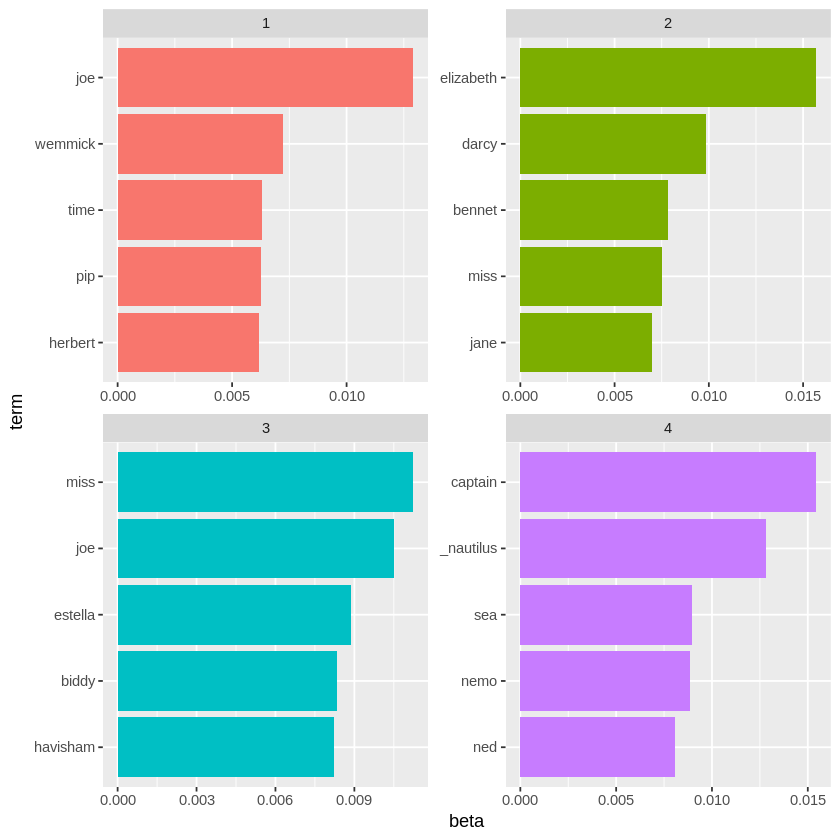

In [35]:
install.packages("ggplot2")
library(ggplot2)

top_terms %>%
  mutate(term = reorder_within(term, beta, topic)) %>%
  ggplot(aes(beta, term, fill = factor(topic))) +
  geom_col(show.legend = FALSE) +
  facet_wrap(~ topic, scales = "free") +
  scale_y_reordered()

Figure 1.4: The terms that are most common within each topic

These topics are pretty clearly associated with the four books! There’s no question that the topic of “captain”, “nautilus”, “sea”, and “nemo” belongs to Twenty Thousand Leagues Under the Sea, and that “jane”, “darcy”, and “elizabeth” belongs to Pride and Prejudice. We see “pip” and “joe” from Great Expectations and “martians”, “black”, and “night” from The War of the Worlds. We also notice that, in line with LDA being a “fuzzy clustering” method, there can be words in common between multiple topics, such as “miss” in topics 1 and 4, and “time” in topics 3 and 4

### 1.2.2 Per-document classification

Each document in this analysis represented a single chapter. Thus, we may want to know which topics are associated with each document

Can we put the chapters back together in the correct books? We can find this by examining the per-document-per-topic probabilities, 𝛾 (“gamma”)

In [36]:
chapters_gamma <- tidy(chapters_lda, matrix = "gamma")
chapters_gamma

document,topic,gamma
<chr>,<int>,<dbl>
Great Expectations_57,1,4.025136e-02
Great Expectations_7,1,1.068299e-01
Great Expectations_17,1,2.317512e-05
Great Expectations_27,1,9.999366e-01
Great Expectations_38,1,1.432837e-05
Great Expectations_2,1,9.999440e-01
Great Expectations_23,1,2.056785e-05
Great Expectations_15,1,9.999528e-01
Great Expectations_18,1,9.999581e-01


Each of these values is an estimated proportion of words from that document that are generated from that topic. For example, the model estimates that each word in the *“r chapters_gamma𝑑𝑜𝑐𝑢𝑚𝑒𝑛𝑡[1]"𝑑𝑜𝑐𝑢𝑚𝑒𝑛𝑡ℎ𝑎𝑠𝑜𝑛𝑙𝑦𝑎" 𝑟𝑝𝑒𝑟𝑐𝑒𝑛𝑡(𝑐ℎ𝑎𝑝𝑡𝑒𝑟𝑠𝑔𝑎𝑚𝑚𝑎gamma[1])”* probability of coming from topic 1 (Pride and Prejudice)

Now that we have these topic probabilities, we can see how well our unsupervised learning did at distinguishing the four books. We’d expect that chapters within a book would be found to be mostly (or entirely), generated from the corresponding topic

First we re-separate the document name into title and chapter, after which we can visualize the per-document-per-topic probability for each (Figure 1.5)

In [37]:
chapters_gamma <- chapters_gamma %>%
  separate(document, c("title", "chapter"), sep = "_", convert = TRUE)

chapters_gamma

title,chapter,topic,gamma
<chr>,<int>,<int>,<dbl>
Great Expectations,57,1,4.025136e-02
Great Expectations,7,1,1.068299e-01
Great Expectations,17,1,2.317512e-05
Great Expectations,27,1,9.999366e-01
Great Expectations,38,1,1.432837e-05
Great Expectations,2,1,9.999440e-01
Great Expectations,23,1,2.056785e-05
Great Expectations,15,1,9.999528e-01
Great Expectations,18,1,9.999581e-01


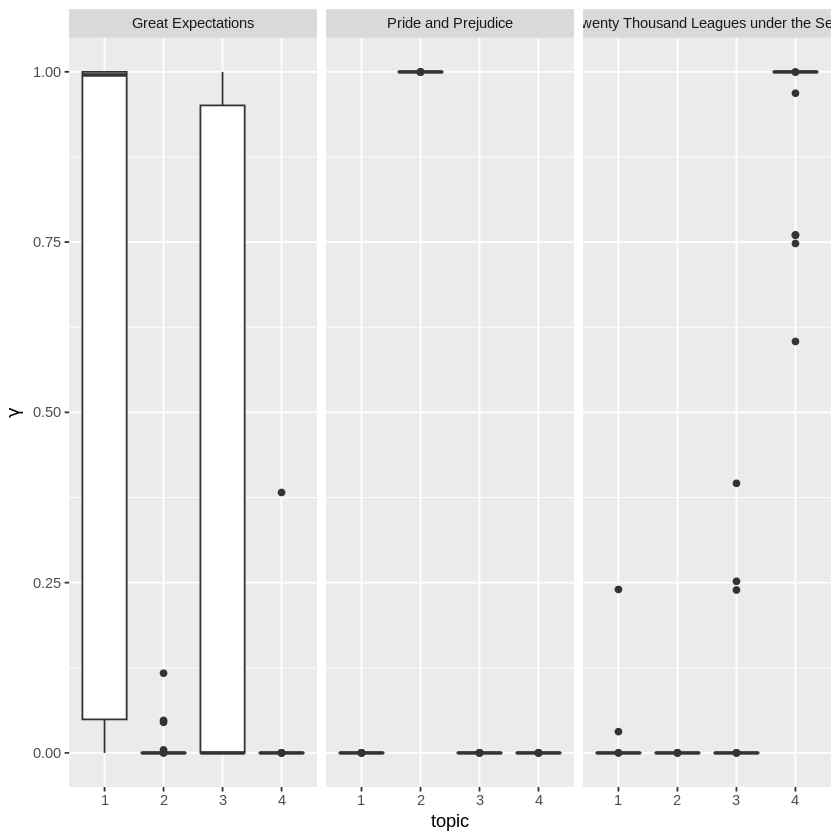

In [38]:
# reorder titles in order of topic 1, topic 2, etc before plotting
chapters_gamma %>%
  mutate(title = reorder(title, gamma * topic)) %>%
  ggplot(aes(factor(topic), gamma)) +
  geom_boxplot() +
  facet_wrap(~ title) +
  labs(x = "topic", y = expression(gamma))

Figure 1.5: The gamma probabilities for each chapter within each book

We notice that almost all of the chapters from Pride and Prejudice, War of the Worlds, and Twenty Thousand Leagues Under the Sea were uniquely identified as a single topic each.

It does look like some chapters from Great Expectations (which should be topic 4) were somewhat associated with other topics. Are there any cases where the topic most associated with a chapter belonged to another book? First we’d find the topic that was most associated with each chapter using `slice_max()`, which is effectively the “classification” of that chapter.

In [39]:
chapter_classifications <- chapters_gamma %>%
  group_by(title, chapter) %>%
  slice_max(gamma) %>% # Within each group (book title and chapter), this function retrieves the row with the maximum 'gamma' value, indicating the most likely topic for that chapter
  ungroup()

chapter_classifications

title,chapter,topic,gamma
<chr>,<int>,<int>,<dbl>
Great Expectations,1,1,0.9998925
Great Expectations,2,1,0.9999440
Great Expectations,3,1,0.9998947
Great Expectations,4,1,0.9999450
Great Expectations,5,1,0.9999517
Great Expectations,6,1,0.9997372
Great Expectations,7,3,0.8931385
Great Expectations,8,1,0.7398063
Great Expectations,9,1,0.9999259


We can then compare each to the “consensus” topic for each book (the most common topic among its chapters), and see which were most often misidentified

In [40]:
book_topics <- chapter_classifications %>%
  count(title, topic) %>%
  group_by(title) %>%
  slice_max(n, n = 1) %>% # For each book title, select the row with the highest count (most prevalent topic)
  ungroup() %>%
  transmute(consensus = title, topic) # Create a new data frame with two columns, 'consensus' (book title) and 'topic', to represent the most prevalent topic for each book

chapter_classifications %>%
  inner_join(book_topics, by = "topic") %>%
  filter(title != consensus) # Filter the chapters where the 'title' (book title) does not match the 'consensus' (most prevalent topic) for that book

title,chapter,topic,gamma,consensus
<chr>,<int>,<int>,<dbl>,<chr>


We see that only two chapters from Great Expectations were misclassified, as LDA described one as coming from the “Pride and Prejudice” topic (topic 1) and one from The War of the Worlds (topic 3). That’s not bad for unsupervised clustering!



###1.2.3 By word assignments: `augment`
One step of the LDA algorithm is assigning each word in each document to a topic. The more words in a document are assigned to that topic, generally, the more weight `(gamma)` will go on that document-topic classification

We may want to take the original document-word pairs and find which words in each document were assigned to which topic

This is the job of the `augment()` function, which also originated in the broom package as a way of tidying model output

While `tidy()` retrieves the statistical components of the model, `augment()` uses a model to add information to each observation in the original data

In [41]:
assignments <- augment(chapters_lda, data = chapters_dtm) # specify the document-term matrix (chapters_dtm) as the data on which you want to apply the LDA model
assignments

document,term,count,.topic
<chr>,<chr>,<dbl>,<dbl>
Great Expectations_57,joe,88,3
Great Expectations_7,joe,70,3
Great Expectations_17,joe,5,3
Great Expectations_27,joe,58,1
Great Expectations_2,joe,56,1
Great Expectations_23,joe,1,3
Great Expectations_15,joe,50,1
Great Expectations_18,joe,50,1
Great Expectations_9,joe,44,1


This returns a tidy data frame of book-term counts, but adds an extra column: `.topic`, with the topic each term was assigned to within each document. (Extra columns added by `augment` always start with `.`, to prevent overwriting existing columns). We can combine this `assignments` table with the consensus book titles to find which words were incorrectly classified

In [42]:
assignments <- assignments %>%
  separate(document, c("title", "chapter"),
           sep = "_", convert = TRUE) %>% # split the document identifier by the underscore ("_") character
  inner_join(book_topics, by = c(".topic" = "topic"))

assignments

title,chapter,term,count,.topic,consensus
<chr>,<int>,<chr>,<dbl>,<dbl>,<chr>
Great Expectations,27,joe,58,1,Great Expectations
Great Expectations,2,joe,56,1,Great Expectations
Great Expectations,15,joe,50,1,Great Expectations
Great Expectations,18,joe,50,1,Great Expectations
Great Expectations,9,joe,44,1,Great Expectations
Great Expectations,13,joe,40,1,Great Expectations
Great Expectations,5,joe,31,1,Great Expectations
Great Expectations,10,joe,34,1,Great Expectations
Great Expectations,30,joe,2,1,Great Expectations


This combination of the true book `(title)` and the book assigned to it `(consensus)` is useful for further exploration. We can, for example, visualize a confusion matrix, showing how often words from one book were assigned to another, using dplyr’s `count()` and ggplot2’s `geom_tile` (Figure 1.6)

In [43]:
install.packages("scales")
library(scales)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



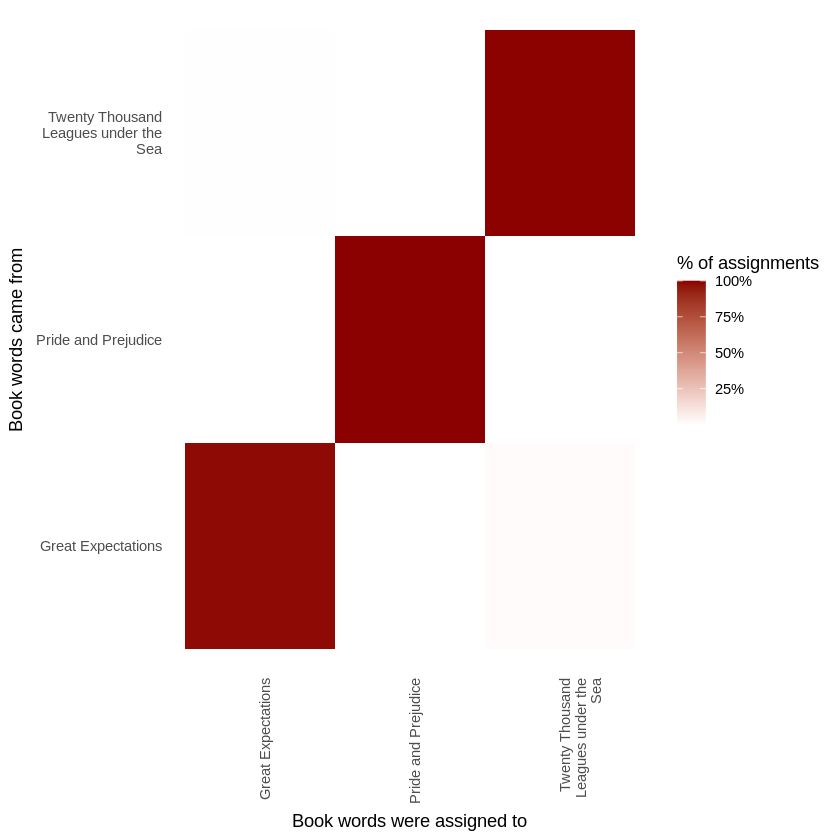

In [44]:
assignments %>%
  count(title, consensus, wt = count) %>% # count the number of assignments for each pair of title and consensus and use wt = count to weight the counts
  mutate(across(c(title, consensus), ~str_wrap(., 20))) %>% # wrap text labels (titles and consensus) to a maximum of 20 characters to make them more readable
  group_by(title) %>%
  mutate(percent = n / sum(n)) %>% # Calculate the percentage of assignments (percent) relative to the total assignments for each source book (title)
  ggplot(aes(consensus, title, fill = percent)) +
  geom_tile() +
  scale_fill_gradient2(high = "darkred", label = percent_format()) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 90, hjust = 1),
        panel.grid = element_blank()) +
  labs(x = "Book words were assigned to",
       y = "Book words came from",
       fill = "% of assignments")

Figure 1.6: Confusion matrix showing where LDA assigned the words from each book. Each row of this table represents the true book each word came from, and each column represents what book it was assigned to

We notice that almost all the words for Pride and Prejudice, Twenty Thousand Leagues Under the Sea, and War of the Worlds were correctly assigned, while Great Expectations had a fair number of misassigned words (which, as we saw above, led to two chapters getting misclassified)

What were the most commonly mistaken words?

In [45]:
# filter for the assignments where the LDA model did not agree with the consensus assignment of the words

wrong_words <- assignments %>%
  filter(title != consensus)

wrong_words

title,chapter,term,count,.topic,consensus
<chr>,<int>,<chr>,<dbl>,<dbl>,<chr>
Twenty Thousand Leagues under the Sea,8,miss,1,1,Great Expectations
Great Expectations,54,sea,2,4,Twenty Thousand Leagues under the Sea
Great Expectations,54,water,15,4,Twenty Thousand Leagues under the Sea
Great Expectations,54,boat,25,4,Twenty Thousand Leagues under the Sea
Great Expectations,55,love,2,2,Pride and Prejudice
Great Expectations,55,lady,2,2,Pride and Prejudice
Great Expectations,54,red,2,4,Twenty Thousand Leagues under the Sea
Great Expectations,54,air,6,4,Twenty Thousand Leagues under the Sea
Great Expectations,54,vessel,1,4,Twenty Thousand Leagues under the Sea


In [46]:
# show the most frequent terms where the consensus and LDA model assignments differed

wrong_words %>%
  count(title, consensus, term, wt = count) %>%
  ungroup() %>%
  arrange(desc(n))

title,consensus,term,n
<chr>,<chr>,<chr>,<dbl>
Great Expectations,Twenty Thousand Leagues under the Sea,boat,25
Great Expectations,Twenty Thousand Leagues under the Sea,galley,16
Great Expectations,Twenty Thousand Leagues under the Sea,water,15
Great Expectations,Twenty Thousand Leagues under the Sea,steamer,12
Great Expectations,Twenty Thousand Leagues under the Sea,shore,9
Great Expectations,Twenty Thousand Leagues under the Sea,board,8
Great Expectations,Twenty Thousand Leagues under the Sea,air,6
Great Expectations,Twenty Thousand Leagues under the Sea,passed,6
Twenty Thousand Leagues under the Sea,Great Expectations,door,6


We can see that a number of words were often assigned to the Pride and Prejudice or War of the Worlds cluster even when they appeared in Great Expectations

For some of these words, such as “love” and “lady”, that’s because they’re more common in Pride and Prejudice (we could confirm that by examining the counts)

On the other hand, there are a few wrongly classified words that never appeared in the novel they were misassigned to

For example, we can confirm “flopson” appears only in Great Expectations, even though it’s assigned to the “Pride and Prejudice” cluster

In [47]:
# check the count of the word "flopson" in your text data

word_counts %>%
  filter(word == "flopson")

document,word,n
<chr>,<chr>,<int>
Great Expectations_22,flopson,10
Great Expectations_23,flopson,7
Great Expectations_33,flopson,1


The LDA algorithm is stochastic, and it can accidentally land on a topic that spans multiple books

##1.3 Alternative LDA implementations
The `LDA()` function in the topicmodels package is only one implementation of the latent Dirichlet allocation algorithm. For example, the [mallet](https://cran.r-project.org/package=mallet) package [@R-mallet] implements a wrapper around the [MALLET](http://mallet.cs.umass.edu/) Java package for text classification tools, and the tidytext package provides tidiers for this model output as well.

The mallet package takes a somewhat different approach to the input format. For instance, it takes non-tokenized documents and performs the tokenization itself, and requires a separate file of stopwords

This means we have to collapse the text into one string for each document before performing LDA

In [48]:
# Install Java in R
system("apt-get update -y")
system("apt-get install -y default-jdk")

In [49]:
# Create symbolic links to the Java libraries
system("ln -s /usr/lib/jvm/default-java/lib/server/libjvm.so /usr/lib/libjvm.so")
system("ln -s /usr/lib/jvm/default-java/lib/server/libjvm.so /usr/local/lib/libjvm.so")

In [50]:
# Set JAVA_HOME Environment Variable
Sys.setenv(JAVA_HOME = "/usr/lib/jvm/default-java")
Sys.setenv(LD_LIBRARY_PATH = paste(Sys.getenv("LD_LIBRARY_PATH"), "/usr/lib/jvm/default-java/lib/server", sep = ":"))

In [51]:
# Install and Load rJava
install.packages("rJava")
library(rJava)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [52]:
install.packages("mallet") # provides tools for topic modeling using the Mallet software
library(mallet)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [53]:
# create a vector with one string per chapter

# remove stop words, remove single quotes from words (for consistency), group the text data by the document,
# and summarize it by concatenating words within each document using a space as a separator
# The resulting data frame collapsed has two columns: "document" and "text," where "document" is a unique
# identifier for each text, and "text" contains the text data for each document, with words separated by spaces
collapsed <- by_chapter_word %>%
  anti_join(stop_words, by = "word") %>%
  mutate(word = str_replace(word, "'", "")) %>%
  group_by(document) %>%
  summarize(text = paste(word, collapse = " "))

# create an empty file of "stopwords" and assign its path to the variable empty_file
file.create(empty_file <- tempfile())
docs <- mallet.import(collapsed$document, collapsed$text, empty_file)

# create a new Mallet topic model with four topics
mallet_model <- MalletLDA(num.topics = 4)
mallet_model$loadDocuments(docs) # load the document data created in step 4 into the Mallet model, making it ready for topic modeling
mallet_model$train(100) # train the Mallet topic model for 100 iterations

[1] TRUE

Once the model is created, however, we can use the `tidy()` and `augment()` functions described in the rest of the chapter in an almost identical way

This includes extracting the probabilities of words within each topic or topics within each document

In [54]:
# word-topic pairs
tidy(mallet_model) # convert the Mallet topic model mallet_model into a tidy data frame

# document-topic pairs
tidy(mallet_model, matrix = "gamma") # convert the Mallet topic model mallet_model into a tidy data frame with a "gamma" matrix

# column needs to be named "term" for "augment"
term_counts <- rename(word_counts, term = word)
augment(mallet_model, term_counts) # augment the Mallet topic model mallet_model with the term counts provided in the "term_counts" data frame

Warning message:
“`tbl_df()` was deprecated in dplyr 1.0.0.
ℹ Please use `tibble::as_tibble()` instead.
ℹ The deprecated feature was likely used in the tidytext package.
  Please report the issue at <https://github.com/juliasilge/tidytext/issues>.”


topic,term,beta
<int>,<chr>,<dbl>
1,chapter,4.353101e-04
2,chapter,5.973494e-04
3,chapter,3.057340e-07
4,chapter,3.976544e-03
1,father,2.900134e-07
2,father,2.596043e-07
3,father,6.298426e-03
4,father,3.012305e-07
1,s,2.900134e-07


document,topic,gamma
<chr>,<int>,<dbl>
Great Expectations_1,1,0.09410339
Great Expectations_10,1,0.04447674
Great Expectations_11,1,0.06152287
Great Expectations_12,1,0.08333333
Great Expectations_13,1,0.03021694
Great Expectations_14,1,0.06003937
Great Expectations_15,1,0.08020538
Great Expectations_16,1,0.07784185
Great Expectations_17,1,0.03184211


document,term,n,.topic
<chr>,<chr>,<int>,<int>
Great Expectations_57,joe,88,2
Great Expectations_7,joe,70,2
Great Expectations_17,biddy,63,2
Great Expectations_27,joe,58,2
Great Expectations_38,estella,58,2
Great Expectations_2,joe,56,2
Great Expectations_23,pocket,53,2
Great Expectations_15,joe,50,2
Great Expectations_18,joe,50,2


We could use ggplot2 to explore and visualize the model in the same way we did the LDA output

##1.4 Summary
This chapter introduces topic modeling for finding clusters of words that characterize a set of documents, and shows how the `tidy()` verb lets us explore and understand these models using dplyr and ggplot2

This is one of the advantages of the tidy approach to model exploration: the challenges of different output formats are handled by the tidying functions, and we can explore model results using a standard set of tools

In particular, we saw that topic modeling is able to separate and distinguish chapters from four separate books, and explored the limitations of the model by finding words and chapters that it assigned incorrectly